In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r"Dataset.csv", delimiter='\t')

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


In [3]:
data.isnull().values.sum()
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Number of participants after eliminating missing values:  1013481


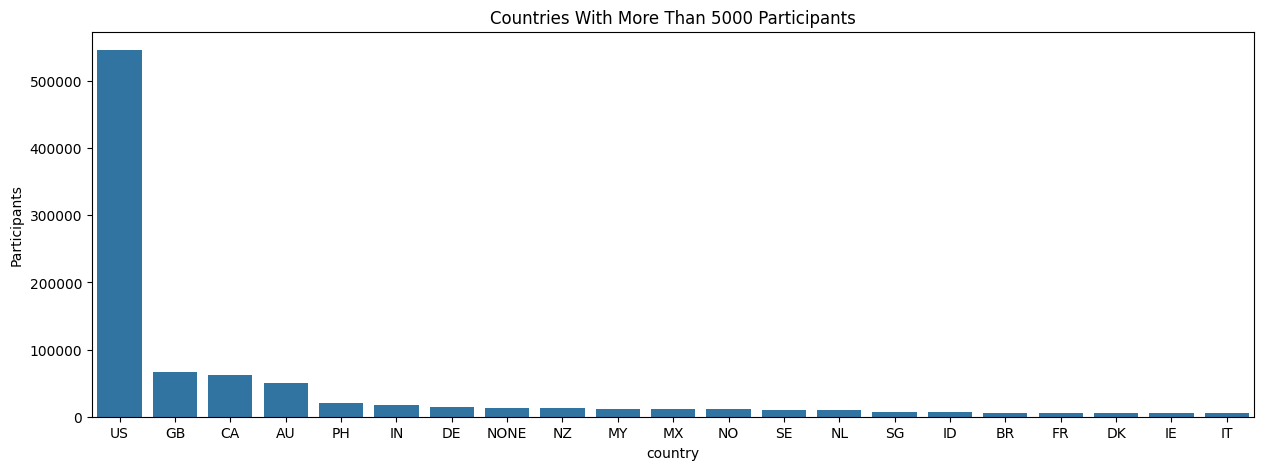

In [4]:
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['count'] >= 5000]

plt.figure(figsize=(15, 5))
sns.barplot(data=countries_5000, x='country', y='count')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants')
plt.show()

In [5]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [6]:
from sklearn.cluster import KMeans

df_model = data.drop('country', axis=1)

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

c:\Users\barry\anaconda3\envs\tf2.10\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\barry\anaconda3\envs\tf2.10\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [7]:
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,2
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,2
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,1


In [8]:
df_model.Clusters.value_counts()

Clusters
4    226937
2    213062
1    209193
0    201236
3    163053
Name: count, dtype: int64

In [9]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.807688,3.628223,2.232975,4.055666,2.284050,3.193400,1.742168,4.070350,2.173796,4.475377,4.251724,2.458014,4.505769,2.145103,3.558086,3.859896,3.988834,3.759327,4.005561,3.930882,2.492755,3.335780,2.596568,3.812479,2.578813,3.829429,2.735912,3.413823,3.653735,3.049579,2.813642,3.346350,3.817135,3.468072,2.101528,3.489217,3.566439,3.036693,2.787021,3.313254,3.500621,2.381622,4.062543,2.136720,3.434137,2.086098,3.679759,3.176832,4.278404,3.722833
1,3.479916,1.935567,4.342096,2.211049,4.269316,1.661231,3.894031,2.800577,3.751913,2.505629,2.320929,3.821892,3.152037,3.283356,2.114980,1.900580,2.111930,1.677862,2.118006,1.718384,1.895551,4.432328,1.835936,4.244363,1.858494,3.843307,1.588017,4.095524,4.097212,4.194562,3.712409,2.586315,4.188606,1.901813,3.134091,2.286721,3.865889,1.938244,3.575794,3.873165,3.887305,1.752903,4.084391,1.793985,4.159695,1.653492,4.314805,3.238354,4.094487,4.297367
2,2.126137,3.305385,3.102238,3.658813,2.961819,2.705184,2.209577,4.000648,2.328839,4.129957,3.476167,3.099811,4.135613,2.620946,2.802827,2.761060,2.843961,2.403207,2.947818,2.685406,1.885930,3.938774,1.686246,4.349837,1.988177,4.139161,2.014691,3.982043,4.170148,3.722780,3.833922,2.232942,4.296787,2.014282,3.236100,2.077780,4.159907,2.014784,3.827125,3.888694,3.574246,2.132694,3.890943,2.061161,3.729773,1.965855,4.012808,2.982686,4.261792,3.815720
3,2.190239,3.284527,2.788149,3.401606,2.584013,2.761538,2.119581,3.521303,2.650936,3.784457,2.346826,3.616063,2.989390,2.916230,2.326360,2.018417,2.309439,1.930152,2.589986,2.251023,3.038576,2.920112,2.588367,2.756018,3.162407,2.634101,3.012309,2.838028,2.587557,2.970163,3.136348,2.836066,3.661865,2.416815,2.362637,2.748456,3.371290,2.520346,2.761654,3.334456,3.536120,1.977762,3.615101,2.059091,3.621467,2.043127,3.882412,3.113276,3.693578,3.666562
4,3.445569,1.919665,3.787100,2.511816,4.036486,1.836003,3.646602,2.773113,3.758581,3.008011,3.815394,2.923811,4.246253,2.411321,3.289283,3.471073,3.809507,3.460828,3.660069,3.177838,2.160450,4.269674,2.654992,4.182650,2.002635,3.999000,1.860411,3.896377,4.130772,3.843053,2.958464,3.600850,3.842194,3.235189,2.238401,3.519184,3.461780,2.827838,2.949162,3.480169,3.737310,2.119914,4.245936,1.968335,3.955296,1.773532,3.960734,3.373134,4.189621,4.198628


In [10]:
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.966369,3.646320,3.149887,3.173935,3.245957
1,3.085132,2.421995,3.208529,3.106305,3.327678
2,3.052860,2.977682,3.187779,3.158232,3.242768
3,2.908635,2.529389,2.850764,2.914993,3.120850
4,3.072295,3.426538,3.300001,3.211323,3.352244


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.378077,-1.293767,1
1,0.371860,3.173811,2
2,-0.544962,2.236561,2
3,1.006360,0.029299,3
4,-4.449139,2.925604,1


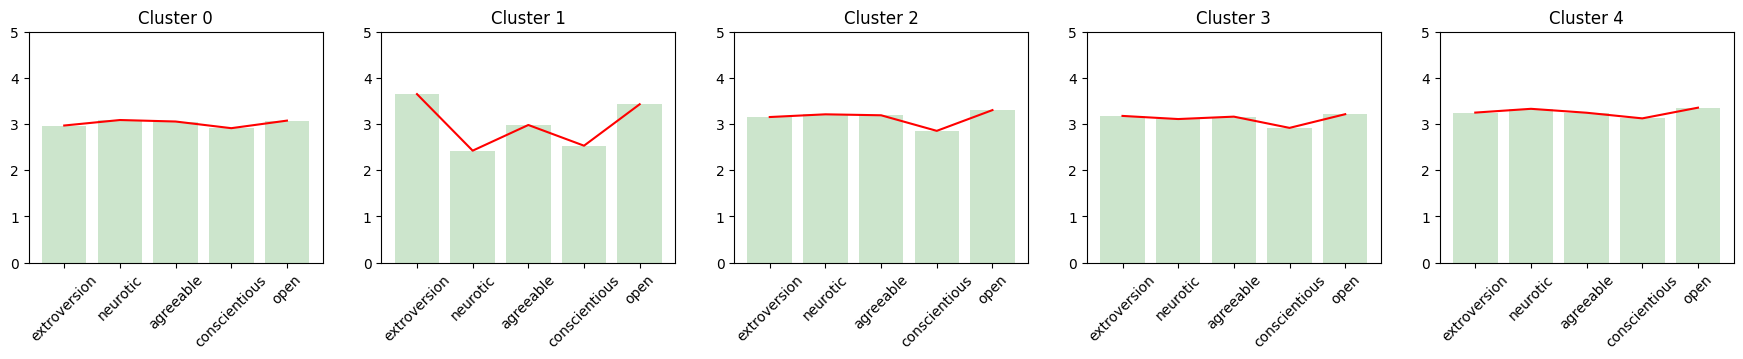

In [12]:
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,5)

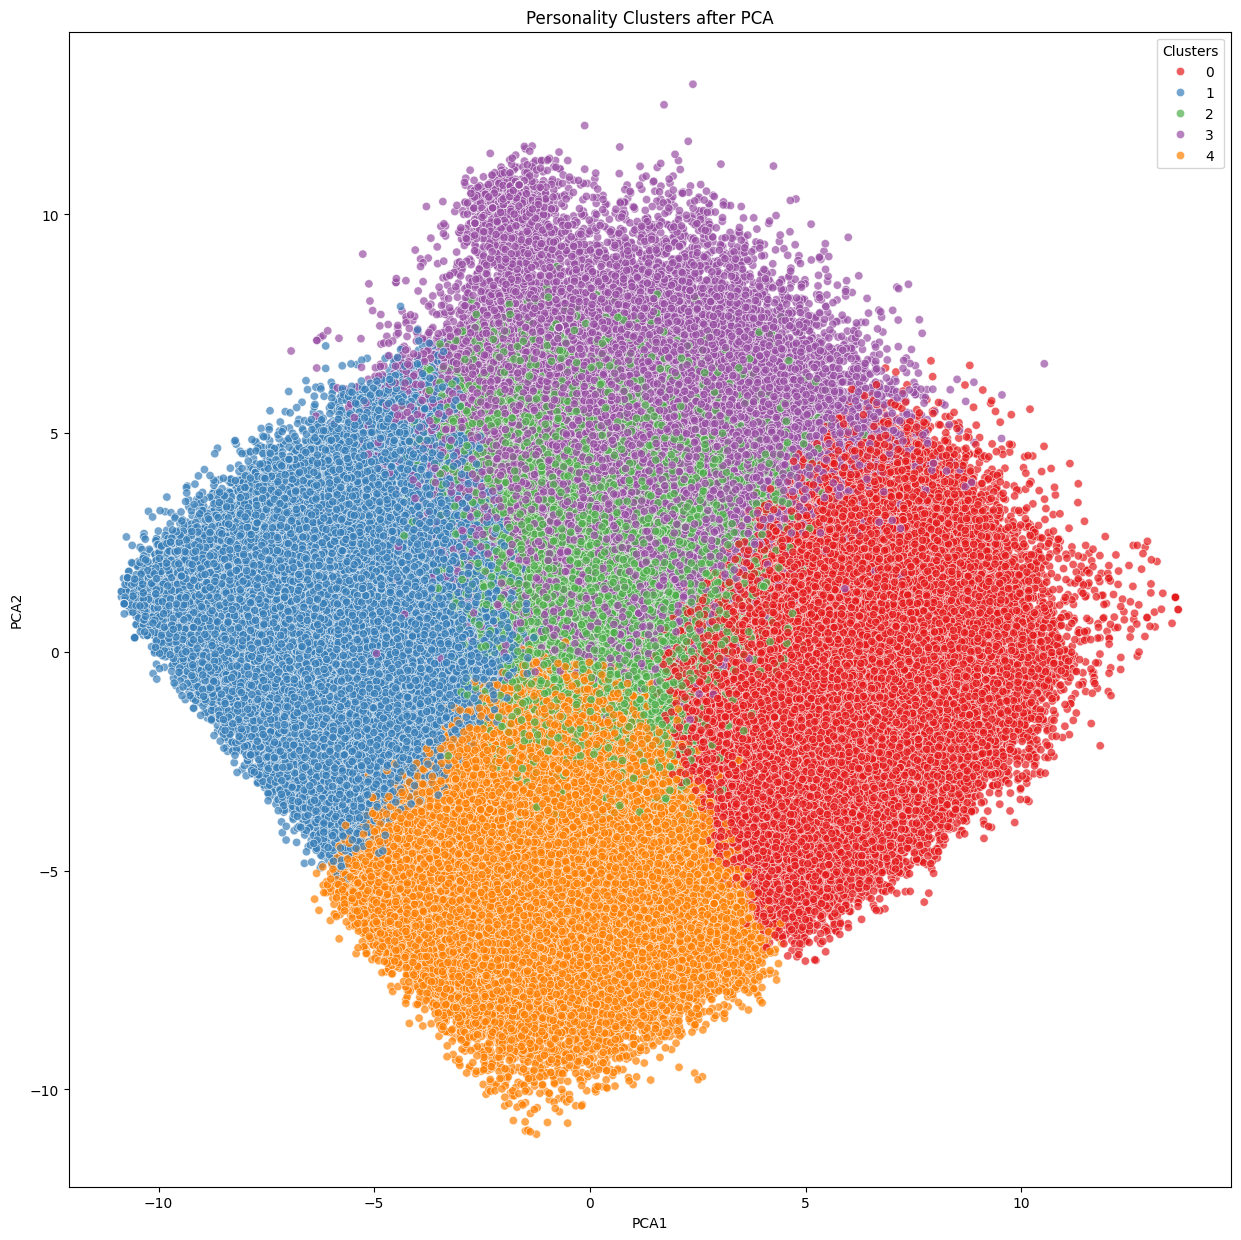

In [13]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set1', alpha=0.7)
plt.title('Personality Clusters after PCA');